In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

In [2]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


Scaling each image with pixel values between (0, 255) to values between (0, 1)

(150, 150, 3)


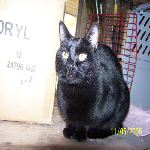

In [3]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

Configuration parameters declaration and encoding text class labels into numeric values.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


CNN model with three convolutional layers, with max pooling for auto-extraction of features from our images and also downsampling the output convolution feature maps.

In [8]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

input_shape = (150, 150, 3)

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)            

In [9]:
batch_size = 30
epochs = 30
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/30
100/100 [==============================] - 73s 733ms/step - loss: 1.1343 - accuracy: 0.5327 - val_loss: 0.7191 - val_accuracy: 0.5230
Epoch 2/30
100/100 [==============================] - 70s 705ms/step - loss: 0.6636 - accuracy: 0.6243 - val_loss: 0.6507 - val_accuracy: 0.6320
Epoch 3/30
100/100 [==============================] - 68s 684ms/step - loss: 0.5973 - accuracy: 0.6857 - val_loss: 0.7576 - val_accuracy: 0.6030
Epoch 4/30
100/100 [==============================] - 67s 672ms/step - loss: 0.5230 - accuracy: 0.7437 - val_loss: 0.5926 - val_accuracy: 0.7100
Epoch 5/30
100/100 [==============================] - 66s 655ms/step - loss: 0.4591 - accuracy: 0.7840 - val_loss: 0.5676 - val_accuracy: 0.7000
Epoch 6/30
100/100 [==============================] - 67s 673ms/step - loss: 0.3703 - accuracy: 0.8310 - val_loss: 0.6386 - val_accuracy: 0.6660
Epoch 7/30
100/100 [==============================] - 68s 684ms/step - loss: 0.2780 - accuracy: 0.8783 - val_loss: 0.6482 - val_ac

In [10]:
def cnn_perfromance_plot(history):    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle('CNN Performance', fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_list = list(range(1,31))
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, 31, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, 31, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")


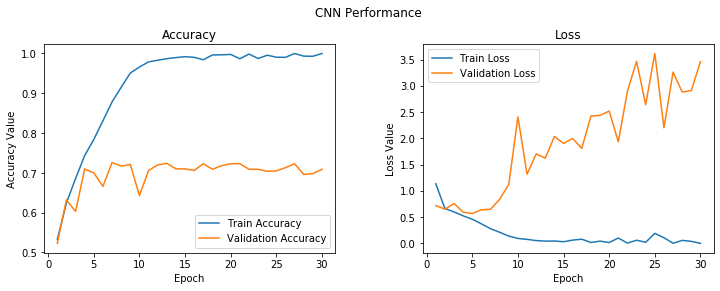

In [11]:
cnn_perfromance_plot(history)

Based on the training and validation accuracy values, we can conclude that Model is overfitting, as training accuracy increases significantly over validation accuracy after 5th epochs as evident from graphs.

We will now improve this CNN model by adding in one more convolution layer, another dense hidden layer. For regularization, we will add dropout of 0.3 after each hidden dense layer.

In [12]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])
              
              
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)            

Epoch 1/30
100/100 [==============================] - 56s 563ms/step - loss: 0.7477 - accuracy: 0.5200 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 54s 539ms/step - loss: 0.7105 - accuracy: 0.5743 - val_loss: 0.6651 - val_accuracy: 0.5570
Epoch 3/30
100/100 [==============================] - 54s 540ms/step - loss: 0.6403 - accuracy: 0.6453 - val_loss: 0.6080 - val_accuracy: 0.6690
Epoch 4/30
100/100 [==============================] - 54s 540ms/step - loss: 0.6256 - accuracy: 0.6567 - val_loss: 0.6281 - val_accuracy: 0.6650
Epoch 5/30
100/100 [==============================] - 59s 588ms/step - loss: 0.5839 - accuracy: 0.7077 - val_loss: 0.5698 - val_accuracy: 0.7080
Epoch 6/30
100/100 [==============================] - 59s 593ms/step - loss: 0.5649 - accuracy: 0.7080 - val_loss: 0.5825 - val_accuracy: 0.6850
Epoch 7/30
100/100 [==============================] - 64s 637ms/step - loss: 0.5317 - accuracy: 0.7407 - val_loss: 0.6885 - val_ac

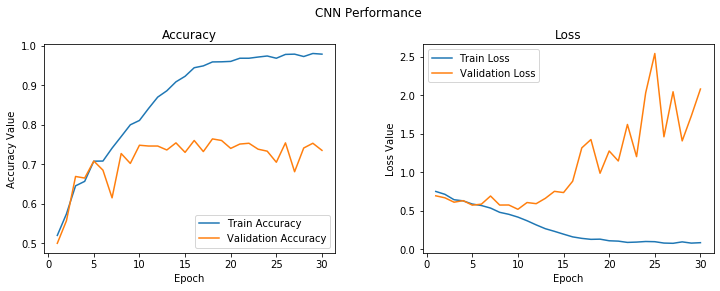

In [15]:
cnn_perfromance_plot(history)

It can be clearly seen from the graph that validation accuracy has slightly improved than model without regularization.

In [16]:
model.save('cats_dogs_classifier_cnn.h5')

Now we will use Pre-trained, VGG-16 model to demostrate transfer learning. We will leverage VGG-16 model as feature extractor.

In [17]:
from keras.applications import vgg16
from keras.models import Model
import keras

input_shape = (150, 150, 3)
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False   

We will flatten the bottleneck features in the vgg_model object to make them ready to be fed to our fully connected classifier. We will use this model and extract out all the features from our training and validation datasets and then feed them as inputs to our classifier. 

In [18]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


Flattened bottleneck features of dimension 1 x 8192 is extracted. Our Classifier will take these features as input.

In [19]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
100/100 [==============================] - 7s 71ms/step - loss: 0.4434 - accuracy: 0.7847 - val_loss: 0.3648 - val_accuracy: 0.8280
Epoch 2/30
100/100 [==============================] - 6s 64ms/step - loss: 0.2883 - accuracy: 0.8800 - val_loss: 0.3131 - val_accuracy: 0.8690
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 0.2394 - accuracy: 0.9007 - val_loss: 0.2906 - val_accuracy: 0.8780
Epoch 4/30
100/100 [==============================] - 6s 63ms/step - loss: 0.2034 - accuracy: 0.9160 - val_loss: 0.2969 - val_accuracy: 0.8700
Epoch 5/30
100/100 [==============================] - 7s 67ms/step - loss: 0.1667 - accuracy: 0.9393 - val_loss: 0.3279 - val_accuracy: 0.8640
Epoch 6/30
100/100 [==============================] - 6s 61ms/step - loss: 0.1487 - accuracy: 0.9413 - val_loss: 0.2925 - val_accuracy: 0.8840
Epoch 7/30
100/100 [==============================] - 6s 58ms/step - loss: 0.1276 - accuracy: 0.9457 - val_loss: 0.2873 - val_accuracy: 0.9020

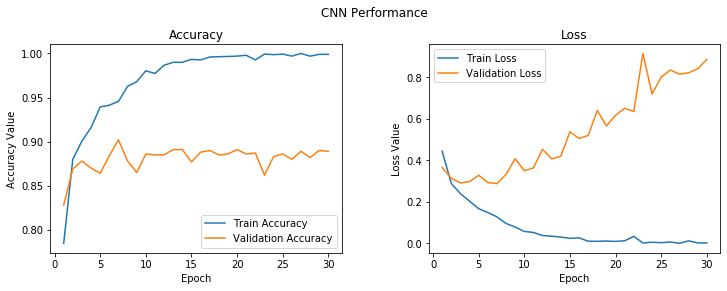

In [21]:
cnn_perfromance_plot(history)

validation accuracy of close to 88%, the model is overfitting on the training data but there is furthur improvement of around 5% comapre to basic CNN model.

In [22]:
model.save('cats_dogs_classifier_tlearn_cnn.h5')

In [23]:
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 
import seaborn as sns

def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    
    print('Model Performance metrics:')
    print('-'*80)
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels,predicted_labels),4))
    print('Precision:', np.round(metrics.precision_score(true_labels,predicted_labels,average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'), 4))
    
    
    print('\nModel Classification report:')
    print('-'*80)
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels, labels=classes) 
    print(report)
    
    
    print('\nPrediction Confusion Matrix:')
    print('-'*80)
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels,labels=classes)
    print(cm)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted');ax.set_ylabel('True'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

Evaluating basic CNN and VGG Model on Test Data

In [24]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
%matplotlib inline

# load saved models
basic_cnn = load_model('cats_dogs_classifier_cnn.h5')
tl_cnn = load_model('cats_dogs_classifier_tlearn_cnn.h5')

# load other configurations
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

# load VGG model for bottleneck features
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                  input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

#def get_bottleneck_features(model, input_imgs):
#    features = model.predict(input_imgs, verbose=0)
#    return features

In [25]:
IMG_DIM = (150, 150)

test_files = glob.glob('test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (1000, 150, 150, 3)
['cat', 'cat', 'cat', 'cat', 'cat'] [0, 0, 0, 0, 0]


Basic CNN model Performance metrics
Model Performance metrics:
--------------------------------------------------------------------------------
Accuracy: 0.739
Precision: 0.7397
Recall: 0.739
F1 Score: 0.7388

Model Classification report:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         cat       0.75      0.71      0.73       500
         dog       0.73      0.77      0.75       500

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000


Prediction Confusion Matrix:
--------------------------------------------------------------------------------
[[356 144]
 [117 383]]


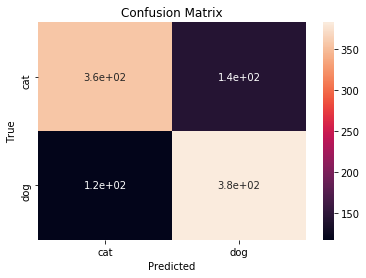

In [29]:
print('Basic CNN model Performance metrics')
predictions = basic_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

VGG model Performance metrics
Model Performance metrics:
--------------------------------------------------------------------------------
Accuracy: 0.905
Precision: 0.9052
Recall: 0.905
F1 Score: 0.905

Model Classification report:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         cat       0.90      0.92      0.91       500
         dog       0.91      0.89      0.90       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.90      1000
weighted avg       0.91      0.91      0.90      1000


Prediction Confusion Matrix:
--------------------------------------------------------------------------------
[[458  42]
 [ 53 447]]


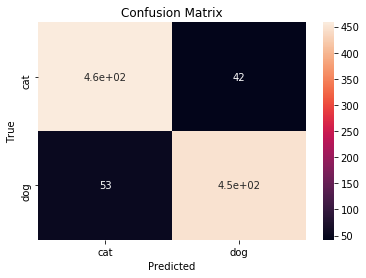

In [28]:
print('VGG model Performance metrics')
test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)

predictions = tl_cnn.predict_classes(test_bottleneck_features, verbose=0)
predictions = num2class_label_transformer(predictions)
display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Basic CNN model has a model accuracy and F1-score of around 74%, and VGG model with transfer learning gives us a model accuracy and F1-score of 91% on Test data of 1000 cats and dogs images. 

In [1]:
import numpy as np
a = np.random.randn(3, 3)
b = np.random.randn(3, 1)
c = a*b

In [2]:
c.shape

(3, 3)